<a href="https://www.kaggle.com/abuubaida01/eda-on-pakistan-s-largest-e-commerce-dataset?scriptVersionId=85586078" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv


# **EDA**

In [2]:
data = pd.read_csv("../input/pakistans-largest-ecommerce-dataset/Pakistan Largest Ecommerce Dataset.csv", index_col ="Customer ID")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
data.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Year,Month,Customer Since,M-Y,FY,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
Customer ID,,,,,,,,,,,,,,,,,,,,,
1.0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,2016.0,7.0,2016-7,7-2016,FY17,NaN,NaN,NaN,NaN,NaN
2.0,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,2016.0,7.0,2016-7,7-2016,FY17,NaN,NaN,NaN,NaN,NaN
3.0,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,2016.0,7.0,2016-7,7-2016,FY17,NaN,NaN,NaN,NaN,NaN
4.0,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,2016.0,7.0,2016-7,7-2016,FY17,NaN,NaN,NaN,NaN,NaN
5.0,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,2016.0,7.0,2016-7,7-2016,FY17,NaN,NaN,NaN,NaN,NaN


 # **Cleaning Data and Transformation of Data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1048575 entries, 1.0 to nan
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

In [5]:
#data.loc[:, 'Unnamed: 21' : 'Unnamed: 25']
data.drop([ 'Unnamed: 22', 'Unnamed: 23','Unnamed: 24'], inplace = True, axis=1)
data.drop('item_id', axis=1, inplace = True)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1048575 entries, 1.0 to nan
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   status                 584509 non-null  object 
 1   created_at             584524 non-null  object 
 2   sku                    584504 non-null  object 
 3   price                  584524 non-null  float64
 4   qty_ordered            584524 non-null  float64
 5   grand_total            584524 non-null  float64
 6   increment_id           584524 non-null  object 
 7   category_name_1        584360 non-null  object 
 8   sales_commission_code  447349 non-null  object 
 9   discount_amount        584524 non-null  float64
 10  payment_method         584524 non-null  object 
 11  Working Date           584524 non-null  object 
 12  BI Status              584524 non-null  object 
 13   MV                    584524 non-null  object 
 14  Year                   584524 non-

In [7]:
data.isnull().sum()

status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Unnamed: 21              1048575
Unnamed: 25              1048575
dtype: int64

In [8]:
data.increment_id.describe()

count        584524
unique       408785
top       100266667
freq             72
Name: increment_id, dtype: object

In [9]:
# Increment id, item_id and customer ID are same.
data.drop('increment_id', axis=1, inplace =True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1048575 entries, 1.0 to nan
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   status                 584509 non-null  object 
 1   created_at             584524 non-null  object 
 2   sku                    584504 non-null  object 
 3   price                  584524 non-null  float64
 4   qty_ordered            584524 non-null  float64
 5   grand_total            584524 non-null  float64
 6   category_name_1        584360 non-null  object 
 7   sales_commission_code  447349 non-null  object 
 8   discount_amount        584524 non-null  float64
 9   payment_method         584524 non-null  object 
 10  Working Date           584524 non-null  object 
 11  BI Status              584524 non-null  object 
 12   MV                    584524 non-null  object 
 13  Year                   584524 non-null  float64
 14  Month                  584524 non-

In [11]:
# have a look on SKU
data.sku.describe()
data.sku.head(15)
#useless for me
data.drop('sku', axis=1, inplace = True)

In [12]:
# Sales commission is also useless.
print(data['sales_commission_code'].describe())
data.drop('sales_commission_code', axis= 1, inplace= True)




count     447349
unique      7226
top           \N
freq      339001
Name: sales_commission_code, dtype: object


In [13]:
# working date, created date, year, Month, M-Y, FY  are same columns
print(data[['Working Date','created_at','Year', 'Month', 'M-Y', 'FY']])

            Working Date created_at    Year  Month     M-Y    FY
Customer ID                                                     
1.0             7/1/2016   7/1/2016  2016.0    7.0  7-2016  FY17
2.0             7/1/2016   7/1/2016  2016.0    7.0  7-2016  FY17
3.0             7/1/2016   7/1/2016  2016.0    7.0  7-2016  FY17
4.0             7/1/2016   7/1/2016  2016.0    7.0  7-2016  FY17
5.0             7/1/2016   7/1/2016  2016.0    7.0  7-2016  FY17
...                  ...        ...     ...    ...     ...   ...
NaN                  NaN        NaN     NaN    NaN     NaN   NaN
NaN                  NaN        NaN     NaN    NaN     NaN   NaN
NaN                  NaN        NaN     NaN    NaN     NaN   NaN
NaN                  NaN        NaN     NaN    NaN     NaN   NaN
NaN                  NaN        NaN     NaN    NaN     NaN   NaN

[1048575 rows x 6 columns]


In [14]:
#so let me make new feature 
data['Date'] = data['Working Date']
#now lets remove other
data.drop(['Working Date','created_at','Year', 'Month', 'M-Y', 'FY'], axis=1, inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1048575 entries, 1.0 to nan
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   status           584509 non-null  object 
 1   price            584524 non-null  float64
 2   qty_ordered      584524 non-null  float64
 3   grand_total      584524 non-null  float64
 4   category_name_1  584360 non-null  object 
 5   discount_amount  584524 non-null  float64
 6   payment_method   584524 non-null  object 
 7   BI Status        584524 non-null  object 
 8    MV              584524 non-null  object 
 9   Customer Since   584513 non-null  object 
 10  Unnamed: 21      0 non-null       float64
 11  Unnamed: 25      0 non-null       float64
 12  Date             584524 non-null  object 
dtypes: float64(6), object(7)
memory usage: 112.0+ MB


In [16]:
data.head(10)

,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,BI Status,MV,Customer Since,Unnamed: 21,Unnamed: 25,Date
Customer ID,,,,,,,,,,,,,
1.0,complete,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,#REF!,"1,950",2016-7,NaN,NaN,7/1/2016
2.0,canceled,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,Gross,240,2016-7,NaN,NaN,7/1/2016
3.0,canceled,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,Gross,"2,450",2016-7,NaN,NaN,7/1/2016
4.0,complete,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,Net,360,2016-7,NaN,NaN,7/1/2016
5.0,order_refunded,555.0,2.0,1110.0,Soghaat,0.0,cod,Valid,"1,110",2016-7,NaN,NaN,7/1/2016
6.0,canceled,80.0,1.0,80.0,Soghaat,0.0,cod,Gross,80,2016-7,NaN,NaN,7/1/2016
7.0,complete,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,Net,360,2016-7,NaN,NaN,7/1/2016
6.0,complete,170.0,1.0,170.0,Soghaat,0.0,cod,Net,170,2016-7,NaN,NaN,7/1/2016
8.0,canceled,96499.0,1.0,96499.0,Mobiles & Tablets,0.0,ublcreditcard,Gross,"96,499",2016-7,NaN,NaN,7/1/2016


In [17]:
# Unnamed: 21; Unnamed: 25; MV, which is equal to price; BI status, Customer Since are not usefull features so lets remove them.
data.drop(['Unnamed: 21', 'Unnamed: 25', 'BI Status', 'Customer Since'], axis=1, inplace = True)

In [18]:
print(data[' MV '].describe())
data.drop(' MV ', axis= 1, inplace = True)

count     584524
unique      9720
top         999 
freq        9516
Name:  MV , dtype: object


In [19]:
data.head()

,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Date
Customer ID,,,,,,,,
1.0,complete,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,7/1/2016
2.0,canceled,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,7/1/2016
3.0,canceled,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,7/1/2016
4.0,complete,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,7/1/2016
5.0,order_refunded,555.0,2.0,1110.0,Soghaat,0.0,cod,7/1/2016


In [20]:
#lets have a look on status
#data.info()
print(data['status'].describe())
data['status'].unique()

count       584509
unique          16
top       complete
freq        233685
Name: status, dtype: object


array(['complete', 'canceled', 'order_refunded', 'received', 'refund',
       'closed', 'fraud', 'holded', 'exchange', 'pending_paypal', 'paid',
       '\\N', 'cod', 'pending', nan, 'processing', 'payment_review'],
      dtype=object)

In [21]:
data['Satisfiction'] = data.status

In [22]:
data.Satisfiction = data.Satisfiction.replace({"order_refunded": "not-satisfy", "canceled": "not-satisfy","refund": "not-satisfy",
                                               "closed": "not-satisfy", "fraud": "not-satisfy", "pending_paypal": "not-satisfy"})

In [23]:
data.Satisfiction = data.Satisfiction.replace({"\\N": "not-satisfy",'cod':'not-satisfy','pending':'not-satisfy','nan':'not-satisfy','processing':'Satisfy',
                                               'payment_review':'Satisfy','paid':'Satisfy','exchange': 'Satisfy', 'holded':'Satisfy','received':'Satisfy','complete':'Satisfy' })

In [24]:
data.Satisfiction.head(10)
data.rename(columns={'Satisficton':'Satisfaction'}, inplace = True)

In [25]:
data.head()

,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Date,Satisfiction
Customer ID,,,,,,,,,
1.0,complete,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,7/1/2016,Satisfy
2.0,canceled,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,7/1/2016,not-satisfy
3.0,canceled,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,7/1/2016,not-satisfy
4.0,complete,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,7/1/2016,Satisfy
5.0,order_refunded,555.0,2.0,1110.0,Soghaat,0.0,cod,7/1/2016,not-satisfy


In [26]:
# this is my final DataFrame, now lets explore each feature and make it perfect for our visualization.
print(data.count())
data.isnull().sum()

status             584509
price              584524
qty_ordered        584524
grand_total        584524
category_name_1    584360
discount_amount    584524
payment_method     584524
Date               584524
Satisfiction       584509
dtype: int64


status             464066
price              464051
qty_ordered        464051
grand_total        464051
category_name_1    464215
discount_amount    464051
payment_method     464051
Date               464051
Satisfiction       464066
dtype: int64

In [27]:
# dropping all row which all element are null
data.dropna(how='all', inplace = True)


In [28]:
#now see, how many null values are avaliable.
data.isnull().sum()



status              15
price                0
qty_ordered          0
grand_total          0
category_name_1    164
discount_amount      0
payment_method       0
Date                 0
Satisfiction        15
dtype: int64

In [29]:
# now lets focuse on status, Satisfaction and category_name_1
data.status.describe()
data.status.mode()
# lets fill status and satisfaction  with mode value
data.status.fillna(str(data.status.mode()), inplace = True)

In [30]:
data.Satisfiction.fillna(str(data.Satisfiction.mode()), inplace = True)
data.isnull().sum()


status               0
price                0
qty_ordered          0
grand_total          0
category_name_1    164
discount_amount      0
payment_method       0
Date                 0
Satisfiction         0
dtype: int64

In [31]:
data.head()

,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Date,Satisfiction
Customer ID,,,,,,,,,
1.0,complete,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,7/1/2016,Satisfy
2.0,canceled,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,7/1/2016,not-satisfy
3.0,canceled,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,7/1/2016,not-satisfy
4.0,complete,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,7/1/2016,Satisfy
5.0,order_refunded,555.0,2.0,1110.0,Soghaat,0.0,cod,7/1/2016,not-satisfy


In [32]:
# lets look category_name_1
data['category_name_1'].unique()

array(["Women's Fashion", 'Beauty & Grooming', 'Soghaat',
       'Mobiles & Tablets', 'Appliances', 'Home & Living',
       "Men's Fashion", 'Kids & Baby', '\\N', 'Others', 'Entertainment',
       'Computing', 'Superstore', 'Health & Sports', 'Books',
       'School & Education', nan], dtype=object)

In [33]:
data['category_name_1'].mode()
# it think, filling with mode would be find.
data['category_name_1'].fillna(str(data['category_name_1'].mode()), inplace = True)

In [34]:
# finally data is completely find.
data.isnull().sum()

status             0
price              0
qty_ordered        0
grand_total        0
category_name_1    0
discount_amount    0
payment_method     0
Date               0
Satisfiction       0
dtype: int64

# **Insights** :

In [35]:
data.head()

,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Date,Satisfiction
Customer ID,,,,,,,,,
1.0,complete,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,7/1/2016,Satisfy
2.0,canceled,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,7/1/2016,not-satisfy
3.0,canceled,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,7/1/2016,not-satisfy
4.0,complete,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,7/1/2016,Satisfy
5.0,order_refunded,555.0,2.0,1110.0,Soghaat,0.0,cod,7/1/2016,not-satisfy


## • What is the best-selling category?


In [36]:
cat = data.groupby('category_name_1')
hpc= cat['price'].agg(np.sum)
bsc= cat['qty_ordered'].agg(np.sum)

print("Best Selling Category\n", bsc)

Best Selling Category
 category_name_1
0    Mobiles & Tablets\ndtype: object      1422.0
Appliances                                58203.0
Beauty & Grooming                         53790.0
Books                                      2641.0
Computing                                 17251.0
Entertainment                             27419.0
Health & Sports                           21420.0
Home & Living                             30065.0
Kids & Baby                               18565.0
Men's Fashion                            101424.0
Mobiles & Tablets                        132695.0
Others                                    84916.0
School & Education                         4136.0
Soghaat                                   47418.0
Superstore                                82542.0
Women's Fashion                           64216.0
\N                                         9647.0
Name: qty_ordered, dtype: float64


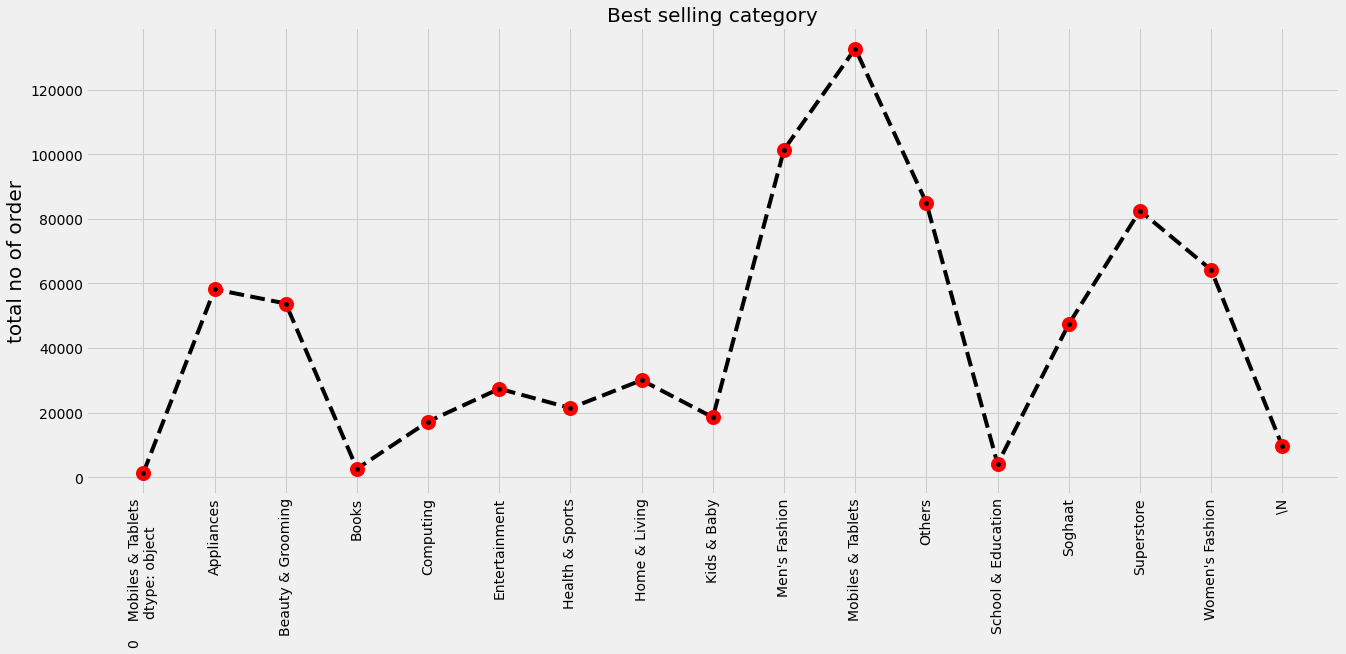

In [37]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20 ,8))
plt.plot(bsc, linestyle='--', marker='o', ms=10, mec='r', color='k',mew=5)
plt.xticks(rotation = 90)
plt.title('Best selling category', size =20)
plt.ylabel('total no of order', size= 20)
plt.show()

## Status of orders and their  satisfaction level w.r.t No of Orders

In [38]:
v = data.groupby('Satisfiction')
level = v['qty_ordered'].agg(np.sum)
level

Satisfiction
0    Satisfy\ndtype: object        19.0
Satisfy                        391240.0
not-satisfy                    366511.0
Name: qty_ordered, dtype: float64

In [39]:
status = data.groupby('status')
no_of_order = status['qty_ordered'].agg(np.sum)
no_of_order

status
0    complete\ndtype: object        19.0
\N                                   6.0
canceled                        278570.0
closed                             538.0
cod                               3366.0
complete                        278990.0
exchange                             4.0
fraud                               10.0
holded                              36.0
order_refunded                   74328.0
paid                              1722.0
payment_review                     168.0
pending                             70.0
pending_paypal                       9.0
processing                          36.0
received                        110284.0
refund                            9614.0
Name: qty_ordered, dtype: float64

Text(0, 0.5, 'No of Orders')

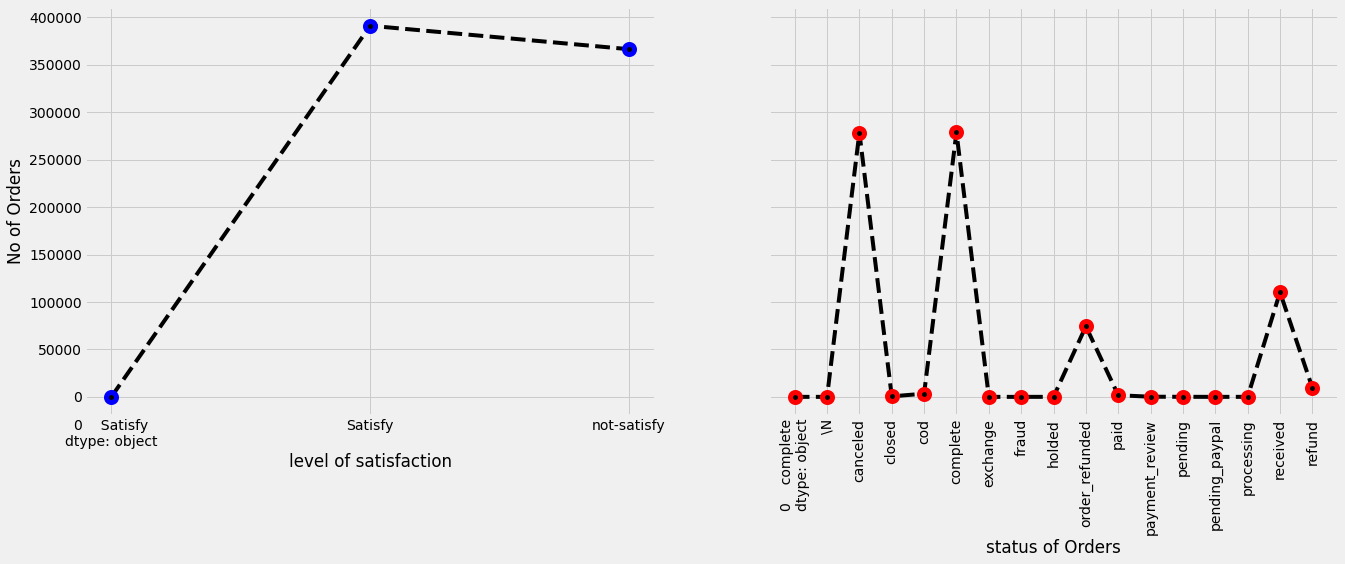

In [40]:
fig, (a, b) = plt.subplots(1,2, figsize=(20,7), sharey = True)
a.plot(level, linestyle='--', marker='o', ms=10, mec='b', color='k',mew=5)
a.set_xlabel('level of satisfaction')

b.plot(no_of_order,linestyle='--', marker='o', ms=10, mec='r', color='k',mew=5 )
b.tick_params(labelrotation=90)
b.set_xlabel('status of Orders')
a.set_ylabel('No of Orders')

In [41]:
data.head()

,status,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Date,Satisfiction
Customer ID,,,,,,,,,
1.0,complete,1950.0,1.0,1950.0,Women's Fashion,0.0,cod,7/1/2016,Satisfy
2.0,canceled,240.0,1.0,240.0,Beauty & Grooming,0.0,cod,7/1/2016,not-satisfy
3.0,canceled,2450.0,1.0,2450.0,Women's Fashion,0.0,cod,7/1/2016,not-satisfy
4.0,complete,360.0,1.0,60.0,Beauty & Grooming,300.0,cod,7/1/2016,Satisfy
5.0,order_refunded,555.0,2.0,1110.0,Soghaat,0.0,cod,7/1/2016,not-satisfy


## Those people who got discount, did they buy the product and what was the status?

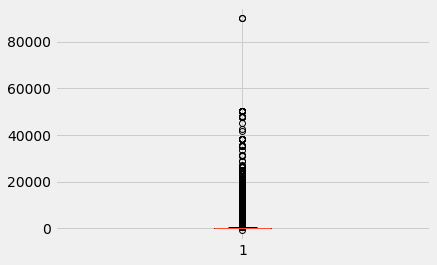

In [42]:
data.discount_amount.value_counts()
plt.boxplot(data.discount_amount)
# lets drop some big bugs
outlier_IDs = data.loc[data.discount_amount > 20000].index
data.drop(outlier_IDs, inplace = True)


In [43]:
d = data.groupby('status')
dis= d['discount_amount'].agg(np.mean)

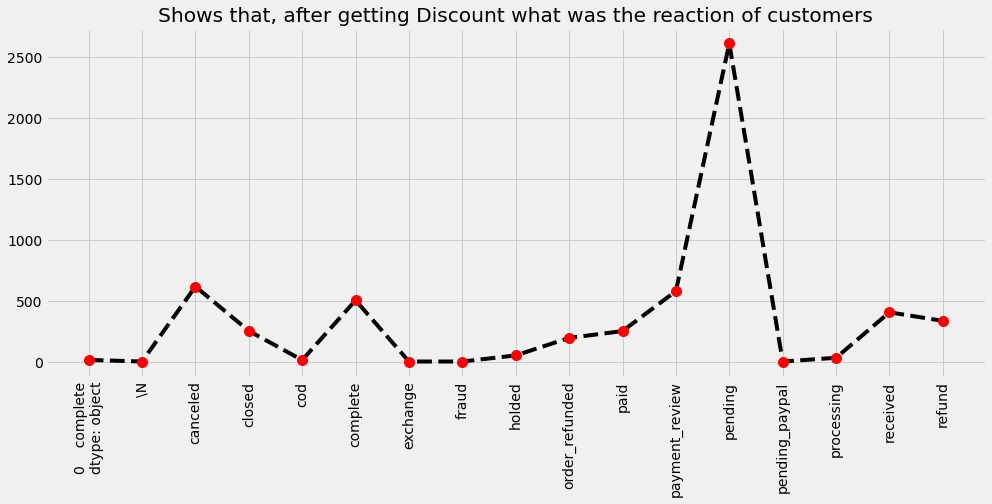

In [44]:
plt.figure(figsize=(15,6))
plt.plot(dis, ls="--", marker='o', mec='r',ms=10, mfc='r', color = 'k')
plt.xticks(rotation= 'vertical')
plt.title('Shows that, after getting Discount what was the reaction of customers')
plt.show()